# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [10]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "html5lib")

In [31]:
import re
rate_table = html.find('table' , attrs = {'title' : '牌告匯率'}).find('tbody').find_all('tr')

title = rate_table[0].find('div' , attrs = {'class': "visible-phone print_hide"}).get_text().replace(' ','').replace('\n','')
buy_rate = rate_table[0].find('td',attrs = {'data-table':"本行現金買入"}).get_text()
sell_rate = rate_table[0].find('td',attrs = {'data-table':"本行現金賣出"}).get_text()

print(title)
print(f'本行即時買入 ： {buy_rate}')
print(f'本行即時賣出 ： {sell_rate}')

美金(USD)
本行即時買入 ： 29.775
本行即時賣出 ： 30.445


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [34]:
'''

  Your code here
  
'''

for i in rate_table:
    title = i.find('div' , attrs = {'class': "visible-phone print_hide"}).get_text().replace(' ','').replace('\n','')
    buy_rate = i.find('td',attrs = {'data-table':"本行現金買入"}).get_text()
    sell_rate = i.find('td',attrs = {'data-table':"本行現金賣出"}).get_text()
    print(title)
    print(f'本行即時買入 ： {buy_rate}')
    print(f'本行即時賣出 ： {sell_rate}')
    print('\n')

美金(USD)
本行即時買入 ： 29.775
本行即時賣出 ： 30.445


港幣(HKD)
本行即時買入 ： 3.716
本行即時賣出 ： 3.92


英鎊(GBP)
本行即時買入 ： 38.28
本行即時賣出 ： 40.4


澳幣(AUD)
本行即時買入 ： 20.36
本行即時賣出 ： 21.14


加拿大幣(CAD)
本行即時買入 ： 22.51
本行即時賣出 ： 23.42


新加坡幣(SGD)
本行即時買入 ： 21.68
本行即時賣出 ： 22.59


瑞士法郎(CHF)
本行即時買入 ： 29.97
本行即時賣出 ： 31.17


日圓(JPY)
本行即時買入 ： 0.2661
本行即時賣出 ： 0.2789


南非幣(ZAR)
本行即時買入 ： -
本行即時賣出 ： -


瑞典幣(SEK)
本行即時買入 ： 2.82
本行即時賣出 ： 3.34


紐元(NZD)
本行即時買入 ： 19.42
本行即時賣出 ： 20.27


泰幣(THB)
本行即時買入 ： 0.875
本行即時賣出 ： 1.063


菲國比索(PHP)
本行即時買入 ： 0.5223
本行即時賣出 ： 0.6553


印尼幣(IDR)
本行即時買入 ： 0.00183
本行即時賣出 ： 0.00253


歐元(EUR)
本行即時買入 ： 32.76
本行即時賣出 ： 34.1


韓元(KRW)
本行即時買入 ： 0.02419
本行即時賣出 ： 0.02809


越南盾(VND)
本行即時買入 ： 0.00093
本行即時賣出 ： 0.00143


馬來幣(MYR)
本行即時買入 ： 6.174
本行即時賣出 ： 7.818


人民幣(CNY)
本行即時買入 ： 4.214
本行即時賣出 ： 4.376




## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

In [39]:
link = rate_table[0].find('td' , attrs = {'data-table':"歷史匯率"}).a['href']
link.split('/')[-1]

'USD'

In [69]:
#https://rate.bot.com.tw/xrt/quote/2019-12/USD
m = '2019-11/'
history_link = 'https://rate.bot.com.tw/xrt/quote/'+ m + link.split('/')[-1]
r = requests.get(history_link)
soup= BeautifulSoup(r.text , 'html5lib')

soup = soup.tbody.find_all('tr')


In [81]:
date_history = []
buy_history = []
sell_history = []

for i in soup:
    date = i.a.get_text()
    date = datetime.strptime(date , '%Y/%M/%d').strftime('%Y/%M/%d')
    buy_rate = float(i.find_all(class_="rate-content-cash text-right print_table-cell")[0].get_text())
    sell_rate = float(i.find_all(class_="rate-content-cash text-right print_table-cell")[1].get_text())
    date_history.append(date)
    buy_history.append(buy_rate)
    sell_history.append(sell_rate)
date_history.reverse()
buy_history.reverse()
sell_history.reverse()

<function matplotlib.pyplot.show(*args, **kw)>

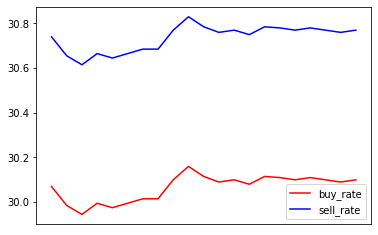

In [83]:
plt.plot(buy_history , 'r' , label = 'buy_rate')
plt.plot(sell_history , 'b' , label = 'sell_rate')
plt.legend()
plt.xticks([])
plt.show

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

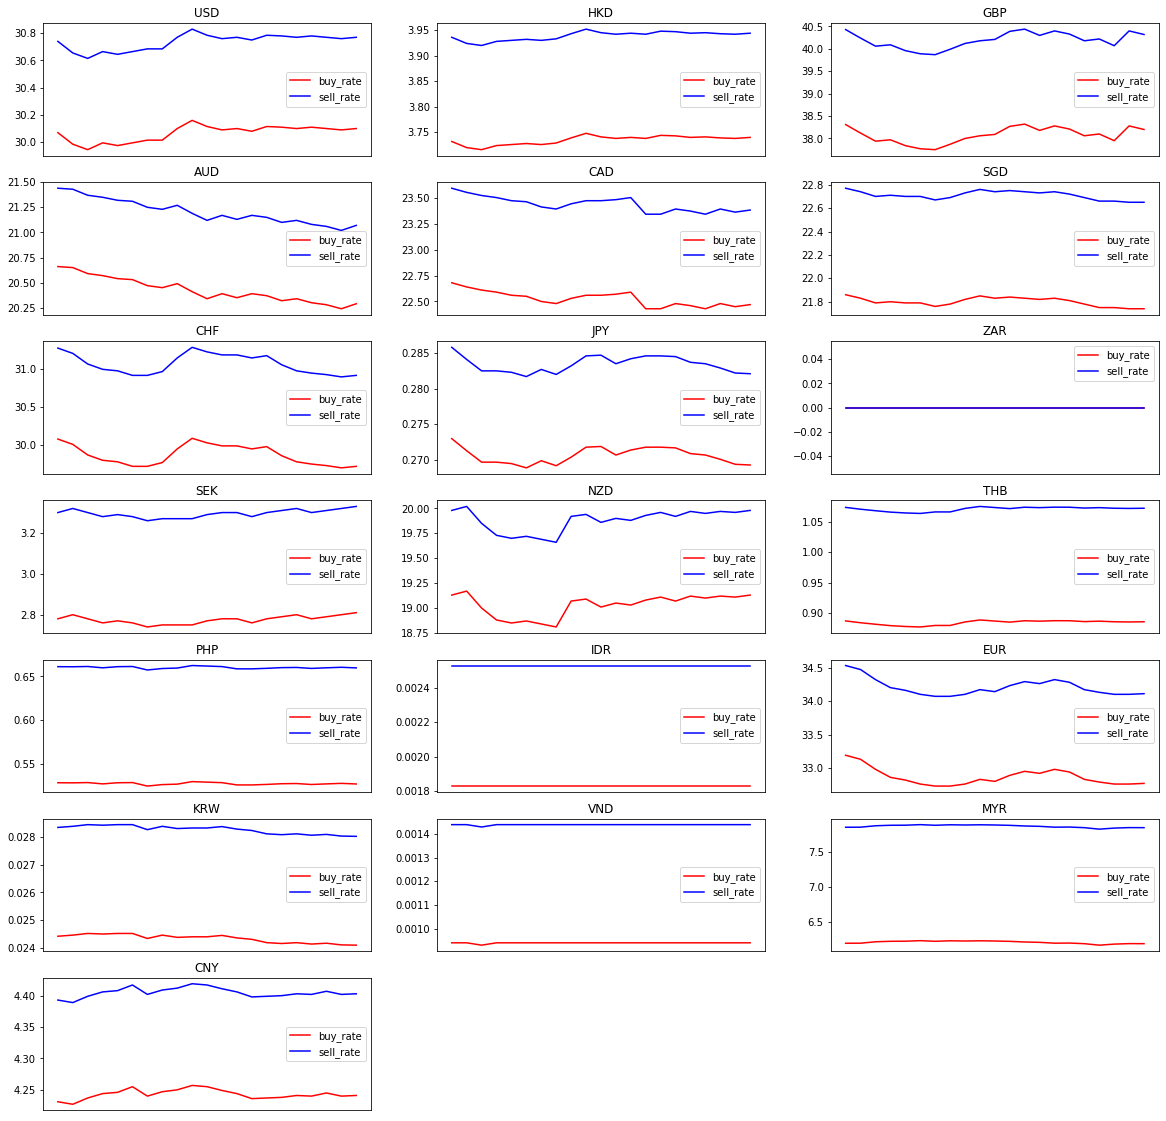

In [111]:
'''

  Your code here

'''
fig = plt.gcf()
fig.set_size_inches(20,20)
k=1
for f in rate_table:
    link = f.find('td' , attrs = {'data-table':"歷史匯率"}).a['href']
    link.split('/')[-1]
    m = '2019-11/'
    history_link = 'https://rate.bot.com.tw/xrt/quote/'+ m + link.split('/')[-1]
    r = requests.get(history_link)
    soup= BeautifulSoup(r.text , 'html5lib')
    soup = soup.tbody.find_all('tr')
    date_history = []
    buy_history = []
    sell_history = []

    for i in soup:
        date = i.a.get_text()
        date = datetime.strptime(date , '%Y/%M/%d').strftime('%Y/%M/%d')
        buy_rate = float(i.find_all(class_="rate-content-cash text-right print_table-cell")[0].get_text())
        sell_rate = float(i.find_all(class_="rate-content-cash text-right print_table-cell")[1].get_text())
        date_history.append(date)
        buy_history.append(buy_rate)
        sell_history.append(sell_rate)
    date_history.reverse()
    buy_history.reverse()
    sell_history.reverse()
    plt.subplot(7,3,k)
    plt.plot(buy_history , 'r' , label = 'buy_rate')
    plt.plot(sell_history , 'b' , label = 'sell_rate')
    plt.title(link.split('/')[-1])
    plt.xticks([])
    plt.legend()
    k = k+1   
plt.show()
    